# Lecture 6: Convolutional Neural Networks

## Excercise 1 (Theory) (25/100)

### Output of a convolution
A convolution is defined as an operation which *convolves* an input feature with a weight matrix. This is the core component of Convolutional Neural Networks (CNNs) as you have seen in the lecture. An example pipeline of a CNN can be summarized in the sketch below taken from [Bishop C. and Bishop H. (2023)](https://www.bishopbook.com)

<p align="center">
  <img src="Figure_23.png" />
</p>

where the general convolution operation between a $3\times 3$ matrix and a convolutional filter of size $2\times 2$ is shown below

<p align="center">
  <img src="Figure_3.png" />
</p>

Now consider the following example of the convolution of a $4 \times 4$ input matrix with a $2 \times 2$ filter as shown in the image below.

<p align="center">
  <img src="cnn_excercise1.png" />
</p>

In the following excercise you have to:

- **Task (1.a)** **(10 pts.)** Explicitly calculate the output of the convolution of a $4 \times 4$ input matrix with a $2 \times 2$ filter, as shown in the image above. Use a stride of 1. What is the shape of the resulting matrix?
- **Task (1.b)** **(5 pts.)** Use different pooling methods to further reduce the output matrix from excercise **1.a** from a $3 \times 3$ to a $2 \times 2$ matrix. The pooling methods you should use are: Average Pooling, Sum Pooling and Max Pooling.
- **Task (1.c)** **(10 pts.)** From the results you got in task **1.b**, and what you learned in the lecture, what can you say about the effects of the different types of pooling operations?

Task (1.a) The output is a 3x3 matix. It is given by $\begin{pmatrix} 7*3-11*4+3*0-9*2 & -11*3+3*4-9*0+0*2 & 3*3+4*4+0*0+8*2\\\ 3*3-9*4+1*0+0*2 & -9*3+0*4+0*0+6*2 & 0*3+8*4+6*0+5*2\\\ 1*3+0*4-3*0+7*2 & 0*3+6*4+7*0-2*2 & 6*3+5*4-2*0+4*2 \end{pmatrix} = \begin{pmatrix} -41 & -21 & 41\\\ -27 & -15 & 42\\\ 17 & 20 & 46 \end{pmatrix}$

Task (1.b) Avg Pooling $\begin{pmatrix} -26 & -11.75\\\ -1.25 & 23.25\end{pmatrix}$, Sum Pooling $\begin{pmatrix} -104 & -47\\\ -5 & 93\end{pmatrix}$, Max Pooling $\begin{pmatrix} -15 & 42\\\ 20 & 46\end{pmatrix}$

Task (1.c) Average Pooling and max pooling essentially do the same thing up do a normalization. The both smooth out the input but get rid of any sharp edges. Average pooling seems to be more sensible for data that is already normalized while max pooling seems more sensible for histogramms and such. Max pooling preserves the maxima of the input at the cost of destroying the minima. 

## Excercise 2 (Theory) (15/100)

### Understanding Receptive Fields in CNNs

In a convolutional neural network (CNN), the [receptive field](https://medium.com/@saba99/receptive-field-1726fe6ea94f#:~:text=In%20Convolutional%20Neural%20Networks%20(CNNs,its%20predictions%20or%20feature%20extractions.)) refers to the area of the input image that a particular neuron in a convolutional layer "sees" through its filter. 

Consider a CNN with the following architecture:

- Input image: $28 \times 28$ pixels (grayscale, i.e., one channel)
- First convolutional layer:
    * Filter size: $M \times M$ (with $M \ll 28$)
    * No padding $(P = 0)$
    * Stride: 1 (filter moves one pixel at a time)

**Task 2.a (5 pts.):**

What is the receptive field size of a neuron in the first convolutional layer for this architecture?

**Task 2.b (10 pts.):**

Now assume $M=3$. Would the receptive field size change if we added padding of size 1 $(P = 1)$ to the input image before the convolutional layer? Motivate your answer with a detailed explanation.



Task 2.a: The receptive field (assuming M to be an odd number as it usually is. The it is even there is an ambivalence in where the "center" of the filter is) of the neuron in the position $(i,j)$ of the $(28-\frac{M-1}{2})\times(28-\frac{M-1}{2})$ first convolutional layer would be the square area of the input data enclosed by and including $(i,j)$ and $(i+M-1,j+M-1)$

Task 2.b: for any neuron that is not at any of the edges of the first convolutional layer nothing would change by adding the padding since any input data would lay beyond the $3x3$ filter. For any point at the edge of the first convolutional layer the receprive field would only change in the sense that previously the neuron would not have existed. Otherwise the perscription from above still works except that not the first convolutional layer is of the size $28\times 28$ and the input data of the size $30\times 30$ however the receptive field of the neuron in the position $(i,j)$ of first convolutional layer would still be the square area of the input data enclosed by and including $(i,j)$ and $(i+M-1,j+M-1)$.\\

Upon further consideration one might also be of the opinion that the padding itself does not constitute part of the input data and should therefore not be counted towards the receptive field. In this case the receptive fields of only those neurons on the edge of the matrix of the neurons of the first convultional data change such that any padding point is excluded thus resulting in appripriatly centered $3\times 2$, $2\times 3$ and $2\times 2$ receptive fields.

## Excercise 1 (Programming) (20/100)

### Convolution and Pooling operation in CNNs

Explain the concepts of convolution and pooling operations in CNNs using PyTorch code.
- **Task (1.a)** **(10 pts.)** Define a simple random tensor `x` representing a grayscale image of size $28 \times 28$. Then define a simple convolutional layer and analyze the output tensor. What is the shape you expect from this convolution operation and why?         
*Hint*: look into the [`torch.nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) function in PyTorch      
- **Task (1.b)** **(10 pts.)** Now define a simple pooling operation of your choice and apply this to the output of the convolution operation. What is the shape you expect from this convolution operation and why? What type of pooling layer have you used and why?         
*Hint*: look into the [`pooling layers`](https://pytorch.org/docs/stable/nn.html#pooling-layers) available in PyTorch.      


The `nn.Conv2d` function expects a shape of (Batchsize, Channels, h, w ), since we are workig with a single greyscale image the batchsize and channels are one.

In [4]:
import torch
import torch.nn as nn

# Define an input tensor in grayscale of shape 28x28
x = torch.rand((1,1,28,28))
# Define a 2D convolutional layer

conv_layer =  nn.Conv2d(1,1,3)

conv_output = conv_layer(x)

print("Convolution Output Shape:", conv_output.shape)

# Define a max pooling layer

pool_layer = nn.LPPool2d(42,4)

# Apply your pooling layer

pooled_output = pool_layer(conv_output)

print("Pooled Output Shape:", pooled_output.shape)

Convolution Output Shape: torch.Size([1, 1, 26, 26])
Pooled Output Shape: torch.Size([1, 1, 6, 6])


To calculate the output size of a Conv layer the following formula holds  [[Source](https://towardsdatascience.com/a-comprehensible-explanation-of-the-dimensions-in-cnns-841dba49df5e)]
$$\text{Output size} = \Biggl\lfloor\frac{(\text{Input size} - \text{Kernel size} + 2 \times \text{Padding})}{\text{Stride}}\Biggr\rfloor + 1 \, .$$
For an kernel size of 3, a padding of 0 and a stride of 1, we expect a outshape of `(26,26)`.

As pooling layer we choosed the `LPPool2d` function wich applies a 2D  42 power-average pooling over the given input. It woas used because it is a little bit exotic. The forumla to calculate the output shape reads [[Source](https://pytorch.org/docs/stable/generated/torch.nn.LPPool2d.html#torch.nn.LPPool2d)]
$$\text{Output size} = \Biggl\lfloor\frac{\text{Input size} - \text{Kernel size} }{\text{Stride}}+1\Biggr\rfloor  \, .$$
For an input size of 26 and Kernel size of 4 we expect a shape of `(6,6)`. Note that as long as no stride is given as argument, the kernel size is used as stride.

## Excercise 2 (Programming) (40/100)

### Implementing a Simple CNN for Image Classification

Train a classifier to perform a classification task on the [`CIFAR10` dataset](https://en.wikipedia.org/wiki/CIFAR-10). You can refer to this [tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) for some inspiration. 
To achieve this, design a simple CNN architecture for image classification using [PyTorch](https://pytorch.org) and fine tune the hyperparameters to achieve the lowest possible loss. As an additional resource, you can take inspiration from the multiple tutorials and blogpost you find online giving you an introduction on how to implement CNNs from scratch with pytorch, e.g., [this one](https://blog.paperspace.com/writing-cnns-from-scratch-in-pytorch/).

- **Task (2.a)** **(15 pts.)** Implement your variation of Simple CNN following the structure below and filling the code gaps with your own implementation. Train the model using your implementation. For your convenience, the dataset is already split into Train and Test Data. 
- **Task (2.b)** **(15 pts.)** Describe your `SimpleCNN` implementation step by step and discuss your implementation based on the performance of your model. As a guidance, you may for example think of answering the following questions: What can you observe? Is your network training as expected? What can you say about the training and test losses? Which type of pooling operations you chose and why?     
- **Task (2.c)** **(10 pts.)** Try to further tune the parameters of your network and the learning hyperparameters to achieve the highest possible accuracy. Comment on how each hyperparameter seems to improve/worsen the training and why you think this happens. Does youe generalization error (see previous lectures) changes when the performance on the training set improves? Provide plots, experiments, and analysis (e.g., losses, accuracies, performance on train and test data etc.) of the results obtained from your experiments in order to support your claims.

To see some development when coosing diffrent Hyperparameters and layouts we abstracted the code into a function, which takes the NN, as well as hyperparameters as arguments

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print("Using device:", device)

Using device: cuda:0


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [4]:
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [5]:
def get_Loader(batchsize):
    train_loader = DataLoader(train_dataset, batch_size=batchsize, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batchsize, shuffle=False)
    return train_loader, test_loader 

train_loader, test_loader = get_Loader(64)

In [6]:
def train_Model(model, epochs,train_loader, criterion=nn.CrossEntropyLoss(),optim=optim.Adam, optim_kwargs={'lr': 0.001}):
        optimizer = optim(model.parameters(), **optim_kwargs)
        model = model.to(device)
        test_losses = np.zeros(epochs)
        for epoch in range(epochs):
                model.train()
                for inputs, labels in train_loader:
                        inputs,labels = inputs.to(device), labels.to(device)
                # initialize the grad to zero
                        optimizer.zero_grad()
                        outputs = model(inputs)
                        loss = criterion(outputs,labels)
                        loss.backward()
                        optimizer.step()
                test_losses[epoch] = loss.item()
                print(f'Epoch {epoch+1}, Loss: {loss.item()}')
        return model, test_losses

def test_Model(model, test_loader):
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs,labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
                
        print(f'Accuracy on test data: {100 * correct / total}%')


**Task (2.a)**

In [10]:
class SimpleCNN(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.conv1 = nn. Conv2d(3,10,5, padding=3) # N -> 10x34x34
        self.pool = nn.MaxPool2d(3) #N -> 10x11x11
        self.conv2 = nn.Conv2d(10,25,3) # -> 25x9x9 
        self.pool2 = nn.MaxPool2d(2) #-> 25x4x4
        self.lin1 = nn.Linear(25*4*4,128)
        self.lin2 = nn.Linear(128,64)
        self.lin3 = nn.Linear(64,10)
    
    def forward(self,x):
        x  = self.pool(F.relu(self.conv1(x)))
        x  = self.pool2(F.relu(self.conv2(x)))
        x = x.view(-1, 25*4*4) 
        x = F.relu(self.lin1(x))            
        x = F.relu(self.lin2(x))           
        x = self.lin3(x) 
        return x

In [11]:
modelSimple, lossSimple = train_Model(SimpleCNN(),75,train_loader)

Epoch 1, Loss: 1.720068097114563
Epoch 2, Loss: 1.7380744218826294
Epoch 3, Loss: 0.9250485301017761
Epoch 4, Loss: 1.5880095958709717
Epoch 5, Loss: 0.6521008610725403
Epoch 6, Loss: 0.8114180564880371
Epoch 7, Loss: 1.1147270202636719
Epoch 8, Loss: 1.1091424226760864
Epoch 9, Loss: 1.2805253267288208
Epoch 10, Loss: 0.508953332901001
Epoch 11, Loss: 0.9028290510177612
Epoch 12, Loss: 0.9105513095855713
Epoch 13, Loss: 0.6765368580818176
Epoch 14, Loss: 0.41346853971481323
Epoch 15, Loss: 0.5925960540771484
Epoch 16, Loss: 0.5437796115875244
Epoch 17, Loss: 0.3628056049346924
Epoch 18, Loss: 0.4617079198360443
Epoch 19, Loss: 0.72311931848526
Epoch 20, Loss: 0.18844309449195862
Epoch 21, Loss: 0.7358641624450684
Epoch 22, Loss: 0.737140953540802
Epoch 23, Loss: 0.3638612627983093
Epoch 24, Loss: 0.3715127408504486
Epoch 25, Loss: 0.42711102962493896
Epoch 26, Loss: 0.527306854724884
Epoch 27, Loss: 0.3093223571777344
Epoch 28, Loss: 0.8440836668014526
Epoch 29, Loss: 0.26579460501670

**Task (2.b)**

Our simple Cnn consists of 2 Cnn layers,  two pooling layers. The fully connectet part consists of three Linear layers.

The first Convelutional layer briungs the three coulor channels up to ten channel. We used a padding of three, to don't cut into  the features at the  edges of an image.  As a pooling function we used the Maxpooling, because we want to highlight teh most present feature of an image and not the avreage of (in worst case) contradicting features.
Our secend layer brings the channel number up to 25 we waive any padding, because  of  the pooling layer before. Afterwards we again use a maxpooling layer with a smaller kernel size,   to prevent the images from becoming too small.

For the fully connected part we used a standard inverted pyramid scheme. importantly we have to end up with 10 neurons representing our ten classes. As a loss function we used the build in CrossEntropyLoss function, therefore there is no need for a softmax function. As optimizer we used the Adam optimizer. 

Looking at our network training loss, we observe a steep dropoff at the beginning. After about 20 epochs the progress settels. All in all the progreess is as expected.  

In the end we archive an accuracy of $65.4\%$, compared to guessing ($10\%$) that is a substatical improvment. But there should be room for improvment.

In [12]:
test_Model(modelSimple,test_loader)

Accuracy on test data: 65.4%


Text(0.5, 0, 'epoch')

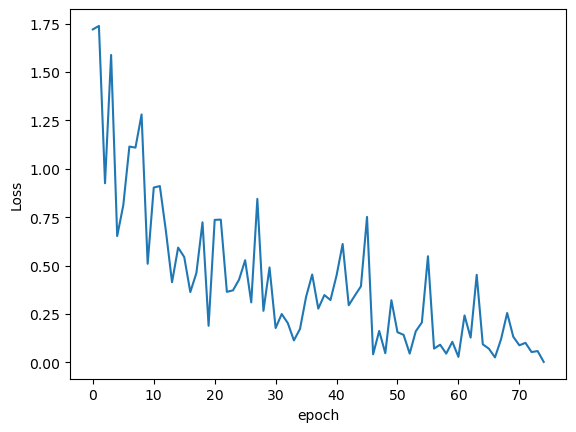

In [13]:
plt.plot(lossSimple)
plt.ylabel('Loss')
plt.xlabel('epoch')

**Task (2.c)**


Before we start modifying any hyperparameters, we modify the design of the CNN.

We introduce one more fully connectet layer, aswall as diffrent Conv. layout and Dropout layers.
Furthermore we use ELu activation functions instead of RELu, because from our experience they perform a little better on these types of tasks.
The probability for a dropout is set fairly low, because we will later also use an L2 regularizer.

In [30]:
class SimpleCNN4(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.stack1 = nn.Sequential(
            nn.Conv2d(3,10,5, padding=4),
            nn.ELU(), # N -> 10x34x34
            nn.Dropout(0.1),
            nn.MaxPool2d(kernel_size=3, stride=2), #N -> 10x11x11
        )
        self.stack2 = nn.Sequential(
            nn.Conv2d(10,25,3), # -> 25x9x9 
            nn.ELU() ,
            nn.Conv2d(25,25,kernel_size=2, padding=1),
            nn.ELU() ,
            nn.Dropout(0.2),
            nn.MaxPool2d(kernel_size=2, stride=2),

        )
        self.stack3 = nn.Sequential(
            nn.Linear(25*8*8,1024),
            nn.ELU(),
            nn.Dropout(0.2),
            nn.Linear(1024,256),
            nn.ELU(),
            nn.Dropout(0.2),
            nn.Linear(256,64),
            nn.ELU(),
            nn.Dropout(0.2),
            nn.Linear(64,10),
        )
    
    def forward(self,x):
        x = self.stack1(x)
        x = self.stack2(x)
        x = x.view(-1, 25*8*8) 
        x = self.stack3(x)
        return x

/home/benedikt/anaconda3/envs/ML_env/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at /home/conda/feedstock_root/build_artifacts/libtorch_1715567101190/work/aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch 1, Loss: 1.3791532516479492
Epoch 2, Loss: 1.5997005701065063
Epoch 3, Loss: 0.9289261102676392
Epoch 4, Loss: 0.7370933294296265
Epoch 5, Loss: 0.9425898790359497
Epoch 6, Loss: 0.6672798991203308
Epoch 7, Loss: 0.38949140906333923
Epoch 8, Loss: 0.6159581542015076
Epoch 9, Loss: 0.40364137291908264
Epoch 10, Loss: 0.39631617069244385
Epoch 11, Loss: 0.6238662004470825
Epoch 12, Loss: 0.24864494800567627
Epoch 13, Loss: 0.4066292643547058
Epoch 14, Loss: 0.2866588532924652
Epoch 15, Loss: 0.47398293018341064
Epoch 16, Loss: 0.28609326481819153
Epoch 17, Loss: 0.13406649231910706
Epoch 18, Loss: 0.18194755911827087
Epoch 19, Loss: 0.22440892457962036
Epoch 20, Loss: 0.7066555023193359
Epoch 21, Loss: 0.06824637949466705
Epoch 22, Loss: 0.5282006859779358
Epoch 23, Loss: 0.11437530070543289
Epoch 24, Loss: 0.3659788966178894
Epoch 25, Loss: 0.03221204876899719
Epoch 26, Loss: 0.007131349295377731
Epoch 27, Loss: 0.20753894746303558
Epoch 28, Loss: 0.006715560331940651
Epoch 29, Lo

Text(0.5, 1.0, 'SimpleCNN 4')

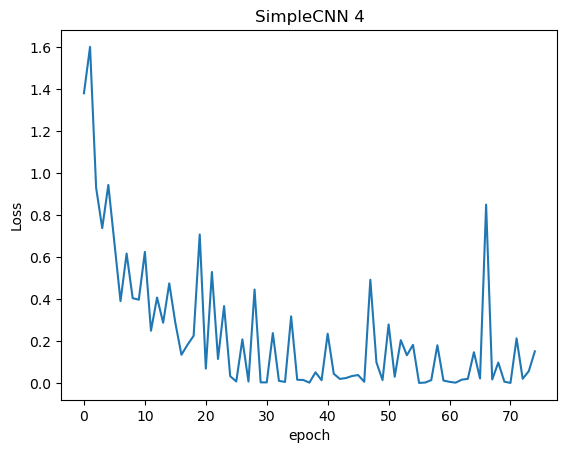

In [31]:
modelSimple4, lossSimple4 = train_Model(SimpleCNN4(),75,train_loader, ) # optim_kwargs={'weight_decay':1e-4}
test_Model(modelSimple4,test_loader)
plt.plot(lossSimple4)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("SimpleCNN 4")

The NN converges much faster than before.
We can already se a imporvmend of about 6%, compared to the much simpler one. That NN will now bethe starting point of our optimization.

We first use a L2 regularizer.

Epoch 1, Loss: 1.3997957706451416
Epoch 2, Loss: 1.221839189529419
Epoch 3, Loss: 0.8733475208282471
Epoch 4, Loss: 1.1839513778686523
Epoch 5, Loss: 0.7952355146408081
Epoch 6, Loss: 0.8303607106208801
Epoch 7, Loss: 1.2368905544281006
Epoch 8, Loss: 0.7150272130966187
Epoch 9, Loss: 0.737049400806427
Epoch 10, Loss: 0.871306300163269
Epoch 11, Loss: 0.5587407946586609
Epoch 12, Loss: 1.1694607734680176
Epoch 13, Loss: 1.0869922637939453
Epoch 14, Loss: 0.31811782717704773
Epoch 15, Loss: 0.7248051166534424
Epoch 16, Loss: 0.3192291259765625
Epoch 17, Loss: 0.48698216676712036
Epoch 18, Loss: 0.9002781510353088
Epoch 19, Loss: 0.5016283988952637
Epoch 20, Loss: 0.5307535529136658
Epoch 21, Loss: 0.4254370331764221
Epoch 22, Loss: 0.5251420140266418
Epoch 23, Loss: 0.4016408324241638
Epoch 24, Loss: 0.6662490367889404
Epoch 25, Loss: 1.112575650215149
Epoch 26, Loss: 0.7078741788864136
Epoch 27, Loss: 0.5187416076660156
Epoch 28, Loss: 0.5394226908683777
Epoch 29, Loss: 0.3675121665000

Text(0.5, 1.0, 'SimpleCNN 2')

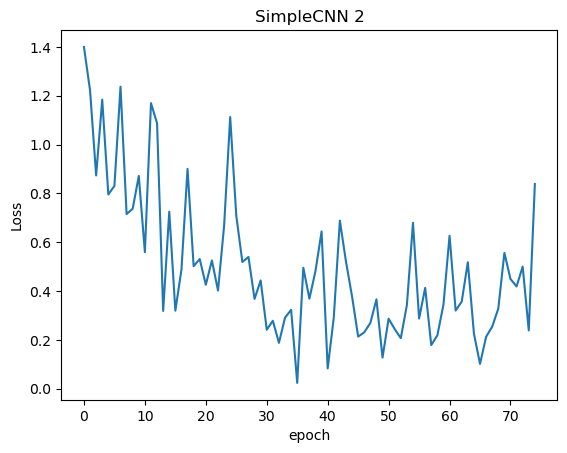

In [38]:
modelSimple2, lossSimple2 = train_Model(SimpleCNN4(),75,train_loader,optim_kwargs={'weight_decay':5e-4} ) # 
test_Model(modelSimple2,test_loader)
plt.plot(lossSimple2)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("SimpleCNN 2")

We tested three different settings (avreaged over 3 runs):

$\lambda = 1\cdot 10^{-4}$: Test accruacy: 75.67%

$\lambda = 5\cdot 10^{-4}$: Test accruacy: 76.21% <-- used in futher calcs

$\lambda = 1\cdot 10^{-3}$: Test accruacy: 75.61%

Overall we see an improvment of about 4%. The reason for that can be deduced from the last sheet, we saw that for an simpler design, we start to overfitt pritty quickly. By utelizing an regularizer we can reduce effects of overfitting to some extends.

As a next the effects of diffrent dropoff probabilities to reduce overfitting even further.

In [41]:
class SimpleCNN3(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.stack1 = nn.Sequential(
            nn.Conv2d(3,10,5, padding=4),
            nn.ELU(), # N -> 10x34x34
            nn.Dropout(0.15),
            nn.MaxPool2d(kernel_size=3, stride=2), #N -> 10x11x11
        )
        self.stack2 = nn.Sequential(
            nn.Conv2d(10,25,3), # -> 25x9x9 
            nn.ELU() ,
            nn.Conv2d(25,25,kernel_size=2, padding=1),
            nn.ELU() ,
            nn.Dropout(0.25),
            nn.MaxPool2d(kernel_size=2, stride=2),

        )
        self.stack3 = nn.Sequential(
            nn.Linear(25*8*8,1024),
            nn.ELU(),
            nn.Dropout(0.25),
            nn.Linear(1024,256),
            nn.ELU(),
            nn.Dropout(0.25),
            nn.Linear(256,64),
            nn.ELU(),
            nn.Dropout(0.25),
            nn.Linear(64,10),
        )
    
    def forward(self,x):
        x = self.stack1(x)
        x = self.stack2(x)
        x = x.view(-1, 25*8*8) 
        x = self.stack3(x)
        return x

Epoch 1, Loss: 1.3593840599060059
Epoch 2, Loss: 0.9972729682922363
Epoch 3, Loss: 2.149754762649536
Epoch 4, Loss: 0.9197346568107605
Epoch 5, Loss: 0.9470203518867493
Epoch 6, Loss: 0.9557592272758484
Epoch 7, Loss: 0.782812774181366
Epoch 8, Loss: 0.7969987392425537
Epoch 9, Loss: 1.4717401266098022
Epoch 10, Loss: 0.739438533782959
Epoch 11, Loss: 0.40177926421165466
Epoch 12, Loss: 0.7485638856887817
Epoch 13, Loss: 0.7818760275840759
Epoch 14, Loss: 1.113024353981018
Epoch 15, Loss: 0.48344311118125916
Epoch 16, Loss: 0.8173918128013611
Epoch 17, Loss: 0.6569904088973999
Epoch 18, Loss: 0.8858003616333008
Epoch 19, Loss: 0.6719093918800354
Epoch 20, Loss: 0.6793893575668335
Epoch 21, Loss: 0.5831387639045715
Epoch 22, Loss: 0.6210960149765015
Epoch 23, Loss: 0.2765045464038849
Epoch 24, Loss: 0.7783204317092896
Epoch 25, Loss: 0.650947630405426
Epoch 26, Loss: 0.5083972215652466
Epoch 27, Loss: 0.35384541749954224
Epoch 28, Loss: 1.048119306564331
Epoch 29, Loss: 1.24567854404449

Text(0.5, 1.0, 'SimpleCNN 3')

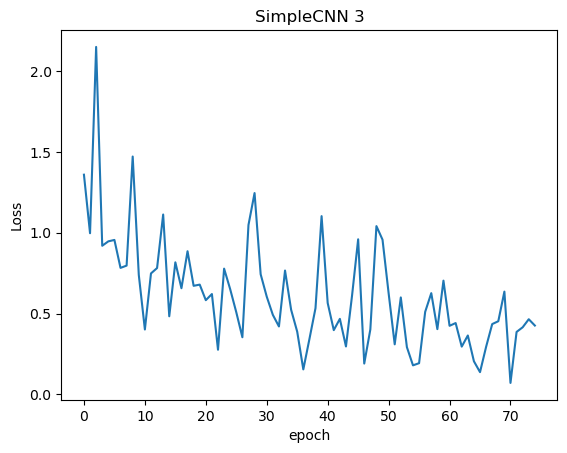

In [42]:
modelSimple3, lossSimple3 = train_Model(SimpleCNN3(),75,train_loader,optim_kwargs={'weight_decay':5e-4} ) # 
test_Model(modelSimple3,test_loader)
plt.plot(lossSimple3)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.title("SimpleCNN 3")

We test for diffrent settings and avreaged over 3 runs each:
All settings are realative to the values of the first NN in task c.

p+=0: Test accruacy: 76.21%

p+=0.05: Test accruacy: 75.52%

p+=0.1: Test accruacy: 74.43%

We obbserve a slightly hihger training loss for higher dropout prob., wich is as expected.

In the end we were able to improve the performe by 10%. Of course a even more complex architecture would probably give better results. But would also lead to more overfitting. We saw some great improvments by using a L2 regularizer. A lot more hyperparametrs aswell as different regularizers could be tested, but we then arrive in a area where we are limmited by our hardware.